#### The aim of this project is to predict the presence of a heart disease. Its a classification problem.

Steps followed in the project:

1) Importing the packages/libraries

2) Reading the dataset

3) Checking the shape

4) Checking the info

5) Data cleaning( Treating the missing values, dropping unwanted columns/rows)

6) Exploratory data analysis

7) Outlier treatment

8) Label encoding/One hot encoding

9) Defining X and y(independent and dependent variable)

10) Splitting the data into train and test

11) Fitting different models

12) Checking the metrics for model evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heartdisease_data.txt")
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [3]:
df.shape

(199, 14)

In [4]:
df.columns=['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [5]:
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
Age         199 non-null int64
Sex         199 non-null int64
cp          199 non-null int64
trestbps    199 non-null object
chol        199 non-null object
fbs         199 non-null object
restecg     199 non-null int64
thalach     199 non-null object
exang       199 non-null object
oldpeak     199 non-null object
slope       199 non-null object
ca          199 non-null object
thal        199 non-null object
num         199 non-null int64
dtypes: int64(5), object(9)
memory usage: 21.8+ KB


In [7]:
df.ca.value_counts()

?    197
0      2
Name: ca, dtype: int64

In [8]:
df.thal.value_counts()

?    165
7     22
6      8
3      4
Name: thal, dtype: int64

In [9]:
df.slope.value_counts()

?    102
2     52
3     29
1     16
Name: slope, dtype: int64

In [10]:
#Since 'ca','thal','slope' are having more than 50% missing data, these columns can be dropped
df.drop(['ca','thal','slope'],axis=1,inplace=True)
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,44,1,4,130,209,0,1,127,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,2
2,55,1,4,142,228,0,1,149,1,2.5,1
3,66,1,3,110,213,1,2,99,1,1.3,0
4,66,1,3,120,0,0,1,120,0,-0.5,0


In [11]:
df.Sex.value_counts()

1    193
0      6
Name: Sex, dtype: int64

In [12]:
df.cp.value_counts()

4    130
3     47
2     14
1      8
Name: cp, dtype: int64

#### Replacing "?" from whichever columns present

In [13]:
df['trestbps'] = df['trestbps'].replace(['?'],'')
df['trestbps']=df['trestbps'].apply(pd.to_numeric)
df['trestbps'].fillna(value=df['trestbps'].median(),inplace=True)

In [14]:
df['chol'] = df['chol'].replace(['?'],'')
df['chol']=df['chol'].apply(pd.to_numeric)
df['chol'].fillna(value=df['chol'].median(),inplace=True)

In [15]:
df['fbs'] = df['fbs'].replace(['?'],'')
df['fbs']=df['fbs'].apply(pd.to_numeric)
df['fbs'].fillna(value=0,inplace=True)

In [16]:
df['thalach'] = df['thalach'].replace(['?'],'')
df['thalach']=df['thalach'].apply(pd.to_numeric)
df['thalach'].fillna(value=df['thalach'].median(),inplace=True)

In [17]:
df['exang'] = df['exang'].replace(['?'],'')
df['exang']=df['exang'].apply(pd.to_numeric)
df['exang'].fillna(value=0,inplace=True)

In [18]:
df['oldpeak'] = df['oldpeak'].replace(['?'],'')
df['oldpeak']=df['oldpeak'].apply(pd.to_numeric)
df['oldpeak'].fillna(value=df['oldpeak'].median(),inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
Age         199 non-null int64
Sex         199 non-null int64
cp          199 non-null int64
trestbps    199 non-null float64
chol        199 non-null float64
fbs         199 non-null float64
restecg     199 non-null int64
thalach     199 non-null float64
exang       199 non-null float64
oldpeak     199 non-null float64
num         199 non-null int64
dtypes: float64(6), int64(5)
memory usage: 17.2 KB


In [20]:
#Converting to Integer
df[['trestbps','exang','thalach','chol','fbs']] = df[['trestbps','exang','thalach','chol','fbs']].astype(int)

In [21]:
display(df.dtypes)

Age           int64
Sex           int64
cp            int64
trestbps      int32
chol          int32
fbs           int32
restecg       int64
thalach       int32
exang         int32
oldpeak     float64
num           int64
dtype: object

In [22]:
df.num.value_counts()

1    56
0    51
3    42
2    40
4    10
Name: num, dtype: int64

In [23]:
#Creating two categories for the output variable. 0 for no heart disease and any other number as presence of heart disease
df['num']=df['num'].apply(lambda x : 0 if x==0 else 1)

In [24]:
df.num.value_counts()

1    148
0     51
Name: num, dtype: int64

In [25]:
#Checking for skewness
df.skew()

Age        -0.397178
Sex        -5.537073
cp         -1.641267
trestbps   -1.312745
chol       -0.594419
fbs         0.672579
restecg     0.396540
thalach     0.258275
exang       0.111565
oldpeak     0.264024
num        -1.124990
dtype: float64

In [26]:
df.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

## EDA

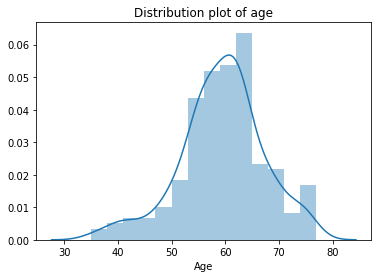

In [27]:
sns.distplot(df.Age)
plt.title("Distribution plot of age")
plt.show()

Most of the people are from age range of 35+ to 80

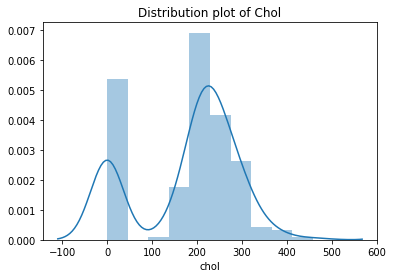

In [28]:
sns.distplot(df.chol)
plt.title("Distribution plot of Chol")
plt.show()

From the above distribution plot, it can be seen that "chol" feature is bimodal where most of the values lie between 1-300.

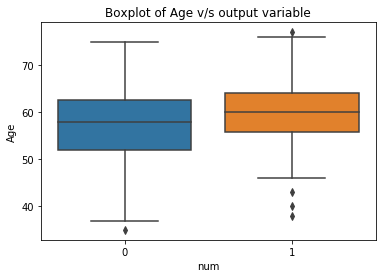

In [29]:
sns.boxplot(df.num,df.Age)
plt.title("Boxplot of Age v/s output variable")
plt.show()

From the above boxplot, it can be seen that heart disease are common as the age nears 60.

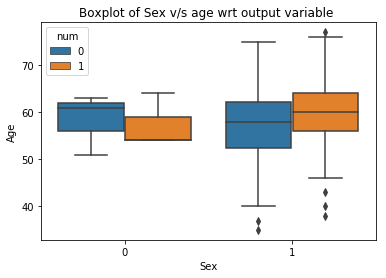

In [30]:
sns.boxplot(df.Sex,df.Age,hue=df.num)
plt.title("Boxplot of Sex v/s age wrt output variable ")
plt.show()

In Class 0 of sex, mid 50's are more prone to heart disease. In class 1 of sex, nearing 60's are more prone to heart disease.

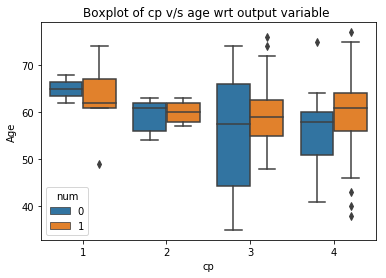

In [31]:
sns.boxplot(df.cp,df.Age,hue=df.num)
plt.title("Boxplot of cp v/s age wrt output variable ")
plt.show()

For all classes of cp, people of age near to 60's are more prone to heart diseases.

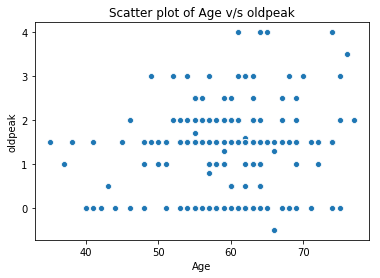

In [32]:
sns.scatterplot(df.Age,df.oldpeak)
plt.title("Scatter plot of Age v/s oldpeak")
plt.show()

From the above scatter plot it can be seen that as the age increases, oldpeak increases slightly.

## Define X and y

In [33]:
X=df.drop('num',axis=1)
X.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak'],
      dtype='object')

In [34]:
y=df.num
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

## Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [37]:
#fitting the model to train data
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred_train=lr.predict(X_train)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
print("\n Accuracy score using logistic regression for train data:", accuracy_score(y_train,y_pred_train))

print("\n Confusion matrix using logistic regression for train data:\n",confusion_matrix(y_train,y_pred_train))
print("\n Classifiaction report for logistice regression for train data:\n",classification_report(y_train,y_pred_train))


 Accuracy score using logistic regression for train data: 0.7987421383647799

 Confusion matrix using logistic regression for train data:
 [[ 13  28]
 [  4 114]]

 Classifiaction report for logistice regression for train data:
               precision    recall  f1-score   support

           0       0.76      0.32      0.45        41
           1       0.80      0.97      0.88       118

   micro avg       0.80      0.80      0.80       159
   macro avg       0.78      0.64      0.66       159
weighted avg       0.79      0.80      0.77       159



In [41]:
#Prediction for test data
y_pred_test=lr.predict(X_test)

In [42]:
print("\n Accuracy score using logistic regression for test data:", accuracy_score(y_test,y_pred_test))
print("\n Confusion matrix using logistic regression for test data:\n",confusion_matrix(y_test,y_pred_test))
print("\n Classifiaction report for logistice regression for test data:\n",classification_report(y_test,y_pred_test))


 Accuracy score using logistic regression for test data: 0.75

 Confusion matrix using logistic regression for test data:
 [[ 3  7]
 [ 3 27]]

 Classifiaction report for logistice regression for test data:
               precision    recall  f1-score   support

           0       0.50      0.30      0.37        10
           1       0.79      0.90      0.84        30

   micro avg       0.75      0.75      0.75        40
   macro avg       0.65      0.60      0.61        40
weighted avg       0.72      0.75      0.73        40



## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [44]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
y_pred_train=dtc.predict(X_train)

In [46]:
print("Accuracy score using Decision tree for train data:", accuracy_score(y_train,y_pred_train))
print("\n Confusion matrix using Decision tree for train data:\n",confusion_matrix(y_train,y_pred_train))
print("\n Classification report using Decision tree for train data:\n",classification_report(y_train,y_pred_train))

Accuracy score using Decision tree for train data: 1.0

 Confusion matrix using Decision tree for train data:
 [[ 41   0]
 [  0 118]]

 Classification report using Decision tree for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       118

   micro avg       1.00      1.00      1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



In [47]:
y_pred_test=dtc.predict(X_test)

In [48]:
print("Accuracy score using Decision tree for test data:", accuracy_score(y_test,y_pred_test))
print("\n Confusion matrix using Decision tree for test data:\n",confusion_matrix(y_test,y_pred_test))
print("\n Classification report using Decision tree for test data:\n",classification_report(y_test,y_pred_test))

Accuracy score using Decision tree for test data: 0.775

 Confusion matrix using Decision tree for test data:
 [[ 5  5]
 [ 4 26]]

 Classification report using Decision tree for test data:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.84      0.87      0.85        30

   micro avg       0.78      0.78      0.78        40
   macro avg       0.70      0.68      0.69        40
weighted avg       0.77      0.78      0.77        40



## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [50]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [51]:
y_pred_train=gbc.predict(X_train)

In [52]:
print("Accuracy score using Gradient Boosting for train data:", accuracy_score(y_train,y_pred_train))
print("\n Confusion matrix using Gradient Boosting for train data:\n",confusion_matrix(y_train,y_pred_train))
print("\n Classification report using Gradient Boosting for train data:\n",classification_report(y_train,y_pred_train))

Accuracy score using Gradient Boosting for train data: 0.9937106918238994

 Confusion matrix using Gradient Boosting for train data:
 [[ 40   1]
 [  0 118]]

 Classification report using Gradient Boosting for train data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      1.00       118

   micro avg       0.99      0.99      0.99       159
   macro avg       1.00      0.99      0.99       159
weighted avg       0.99      0.99      0.99       159



In [53]:
y_pred_test=gbc.predict(X_test)

In [54]:
print("Accuracy score using Gradient Boosting for test data:", accuracy_score(y_test,y_pred_test))
print("\n Confusion matrix using Gradient Boosting for test data:\n",confusion_matrix(y_test,y_pred_test))
print("\n Classification report using Gradient Boosting for test data:\n",classification_report(y_test,y_pred_test))

Accuracy score using Gradient Boosting for test data: 0.775

 Confusion matrix using Gradient Boosting for test data:
 [[ 4  6]
 [ 3 27]]

 Classification report using Gradient Boosting for test data:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.82      0.90      0.86        30

   micro avg       0.78      0.78      0.78        40
   macro avg       0.69      0.65      0.66        40
weighted avg       0.76      0.78      0.76        40



## ROC and AUC for above algorithms

### For logistic Regression

In [55]:
import sklearn.metrics as metrics
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

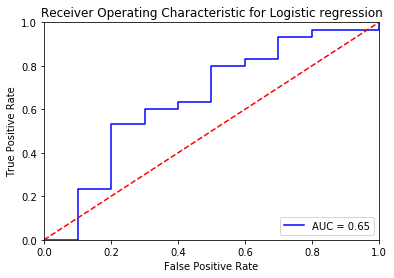

In [56]:
plt.title('Receiver Operating Characteristic for Logistic regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### For Decision tree

In [57]:
import sklearn.metrics as metrics
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

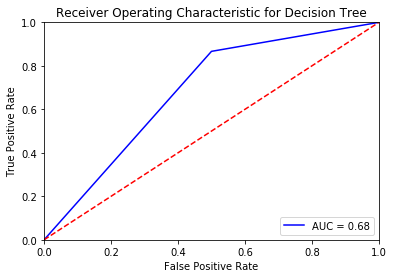

In [58]:
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### For Gradient Boosting

In [59]:
import sklearn.metrics as metrics
probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

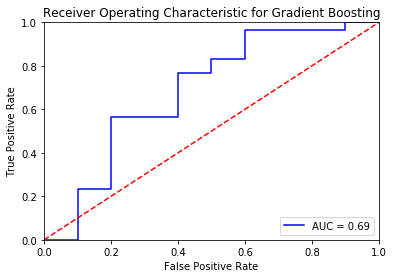

In [60]:
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### From the above findings it can be noted that GRadient boosting algorithm is performing the best in terms of accuracy, confusion matrix, classification report, AUC and ROC as compared to other algorithms.

## Serialization

In [61]:
import pickle
heart_disease_model = pickle.dumps(gbc)
 

In [62]:
gbc_from_pickle = pickle.loads(heart_disease_model)

In [63]:
gbc_from_pickle.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

## Findings from the project

1) Heart diseases are common for people nearing age 60.

2)In class '0' of sex, mid 50's are more prone to heart disease. In class 1 of sex, people nearing 60's are more prone to heart diseases.

3) For all classes of cp, people of age nearing 60'2 are more prone to heart diseases.